In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'] = "serif"
matplotlib.rcParams['mathtext.fontset'] = "cm"
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
import xarray as xr
from xgcm import Grid
import numpy as np
import cmocean
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Figure to generate (Equilibrium energy as a function of resolution)
# (jake)

In [3]:
#1/4 degree resolution, surface diagnostics are for uppermost 5 meters.
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix5/
# fs1 = xr.open_dataset('static.nc', decode_times=False)
os1 = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc'], decode_times=False)

#1/8 degree resolution, surface diagnostics are for uppermost 5 meters.
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.125deg_N15_baseline_hmix5/
# fs2 = xr.open_dataset('static.nc', decode_times=False)
os2 = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc'], decode_times=False)

#1/16 degree resolution, surface diagnostics are for uppermost 5 meters.
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.0625deg_N15_baseline_hmix5/
# fs3 = xr.open_dataset('static.nc', decode_times=False)
os3 = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc','sub03/ocean.stats.nc','sub04/ocean.stats.nc',
                        'sub05/ocean.stats.nc'], decode_times=False)

#1/32 degree resolution, surface diagnostics are for uppermost 5 meters.
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5
# fs4 = xr.open_dataset('static.nc', decode_times=False)
os4 = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc','sub03/ocean.stats.nc','sub04/ocean.stats.nc',
                        'sub05/ocean.stats.nc','sub06/ocean.stats.nc','sub07/ocean.stats.nc','sub08/ocean.stats.nc',
                        'sub09/ocean.stats.nc','sub10/ocean.stats.nc','sub11/ocean.stats.nc','sub12/ocean.stats.nc',
                        'sub13/ocean.stats.nc','sub14/ocean.stats.nc','sub15/ocean.stats.nc','sub16/ocean.stats.nc',
                        'sub17/ocean.stats.nc','sub18/ocean.stats.nc','sub19/ocean.stats.nc','sub20/ocean.stats.nc'], decode_times=False)

%cd /glade/p/univ/unyu0004/jsteinberg

/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.125deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.0625deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/jsteinberg


In [4]:
time1=np.arange(os1.Time.shape[0])*5
time2=time1[-1]+np.arange(os2.Time.shape[0])*5
time3=time2[-1]+np.arange(os3.Time.shape[0])*5
time4=time3[-1]+np.arange(os4.Time.shape[0])*5

In [ ]:
KE_series = np.array([os1.KE[-100:].sum(axis=1).mean('Time'), os2.KE[-100:].sum(axis=1).mean('Time'), \
                       os3.KE[-100:].sum(axis=1).mean('Time'), os4.KE[-100:].sum(axis=1).mean('Time')])
APE_series = np.array([os1.APE[-100:].sum(axis=1).mean('Time'), os2.APE[-100:].sum(axis=1).mean('Time'), \
                       os3.APE[-100:].sum(axis=1).mean('Time'), os4.APE[-100:].sum(axis=1).mean('Time')])
TE_series = np.array([os1.En[-100:].mean('Time'), os2.En[-100:].mean('Time'), \
                       os3.En[-100:].mean('Time'), os4.En[-100:].mean('Time')])

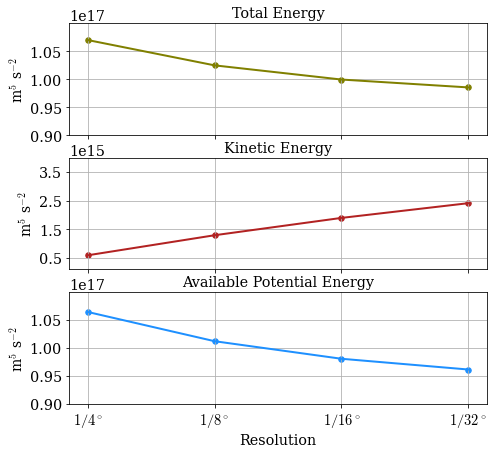

In [20]:
f, (ax3,ax1,ax2) = plt.subplots(3,1,figsize=(7.5,7)); colors = ['#B22222','#1E90FF','#808000']
kesf = 1000 # np.nanmean(TE_series)
ax1.scatter(0,os1.KE[-100:].sum(axis=1).mean('Time')/kesf,color=colors[0],s=30)
ax1.scatter(1,os2.KE[-100:].sum(axis=1).mean('Time')/kesf,color=colors[0],s=30)
ax1.scatter(2,os3.KE[-100:].sum(axis=1).mean('Time')/kesf,color=colors[0],s=30)
ax1.scatter(3,os4.KE[-100:].sum(axis=1).mean('Time')/kesf,color=colors[0],s=30)
ax1.plot(np.arange(4), KE_series/kesf, color=colors[0],linewidth=2, label='KE')

pesf = 1000 # np.nanmean(TE_series)
ax2.scatter(0,os1.APE[-100:].sum(axis=1).mean('Time')/pesf,color=colors[1],s=30)
ax2.scatter(1,os2.APE[-100:].sum(axis=1).mean('Time')/pesf,color=colors[1],s=30)
ax2.scatter(2,os3.APE[-100:].sum(axis=1).mean('Time')/pesf,color=colors[1],s=30)
ax2.scatter(3,os4.APE[-100:].sum(axis=1).mean('Time')/pesf,color=colors[1],s=30)
ax2.plot(np.arange(4), APE_series/pesf, color=colors[1],linewidth=2,label='(APE)/10$^2$')

tesf = 1000 # np.nanmean(TE_series)
ax3.scatter(0,os1.En[-100:].mean('Time')/tesf,color=colors[2],s=30)
ax3.scatter(1,os2.En[-100:].mean('Time')/tesf,color=colors[2],s=30)
ax3.scatter(2,os3.En[-100:].mean('Time')/tesf,color=colors[2],s=30)
ax3.scatter(3,os4.En[-100:].mean('Time')/tesf,color=colors[2],s=30)
ax3.plot(np.arange(4), TE_series/tesf, color=colors[2],linewidth=2,label='(Total Energy)/10$^2$')

ax1.set_xticks([0,1,2,3]); ax2.set_xticks([0,1,2,3]); ax3.set_xticks([0,1,2,3]);
ax3.set_xticklabels([]); ax1.set_xticklabels([]); 
ax2.set_xticklabels(['$1/4^\circ$', '$1/8^\circ$', '$1/16^\circ$', '$1/32^\circ$'])

# -- if using log y sclae 
# ax1.set_ylim([5*10**(14), 5*10**(15)])
# ax2.set_ylim([8e16, 1.2e17])
# ax3.set_ylim([8e16, 1.2e17])
# ax1.set_yscale('log'); ax2.set_yscale('log'); ax3.set_yscale('log')
# ax1.set_yticks([6e14, 1e15, 2e15, 3e15, 4e15, 5e15])
# ax1.set_yticklabels(['0.6','1','2','3','4','5'],fontsize=11)
# ax2.set_yticks([8e16, 9e16, 9.5e16, 1e17, 1.05e17, 1.1e17, 1.15e17, 1.2e17]) # , 1.25e20, 1.3e20
# ax2.set_yticklabels(['0.8','0.9','','1','','1.1','','1.2'],fontsize=11)
# ax3.set_yticks([8e16, 9e16, 9.5e16, 1e17, 1.05e17, 1.1e17, 1.15e17, 1.2e17]) # , 1.25e20, 1.3e20
# ax3.set_yticklabels(['0.8','0.9','','1','','1.1','','1.2'],fontsize=11)
# ax1.text(-0.15,5.4*10**(15),'1e15', fontsize=11)
# ax2.text(-0.15,1.22*10**(17),'1e17', fontsize=11)
# ax3.text(-0.15,1.22*10**(17),'1e17', fontsize=11)

# -- if not
ax1.set_ylim([0.1e15, 4e15])
ax2.set_ylim([0.9e17, 1.1e17])
ax3.set_ylim([0.9e17, 1.1e17])
ax1.set_yticks([0.5e15, 1.5e15, 2.5e15, 3.5e15])
ax2.set_yticks([0.9e17, 0.95e17, 1e17, 1.05e17])
# # ax2.set_yticklabels(['0.9', '', '0.95', '', '1', '1.05'])
ax3.set_yticks([0.9e17, 0.95e17, 1e17, 1.05e17])
# # ax3.set_yticklabels(['0.9', '', '0.95', '', '1', '1.05'])

ax1.set_ylabel(r'm$^5$ s$^{-2}$',fontsize=14) 
ax2.set_ylabel(r'm$^5$ s$^{-2}$',fontsize=14)
ax3.set_ylabel(r'm$^5$ s$^{-2}$',fontsize=14)
ax1.set_title('Kinetic Energy')
ax2.set_title('Available Potential Energy')
ax3.set_title('Total Energy')
ax2.set_xlabel('Resolution'); ax1.grid(); ax2.grid(); ax3.grid();
f.savefig('energy_by_resolution_linear.png',dpi=300,bbox_inches='tight',pad_inches=0.1) # dpi=300,

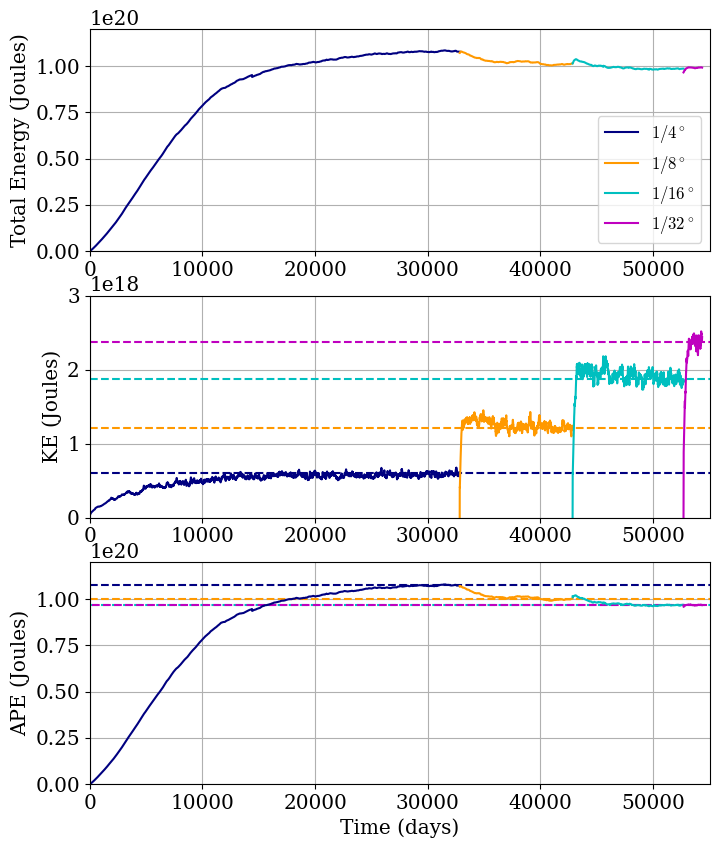

In [5]:
# OLD figure from Elizabeth 
plt.figure(figsize=(8,10),dpi=100)
plt.subplot(3,1,1)

plt.plot(time1,os1.En,label='$1/4^\circ$',color=[0,0,0.5])
plt.plot(time2,os2.En,label='$1/8^\circ$',color=[1,.6,0]) #[0:1002]
plt.plot(time3,os3.En,label='$1/16^\circ$',color='c')
plt.plot(time4,os4.En,label='$1/32^\circ$',color='m')
plt.xlim((0,55000)); plt.ylim((0.,1.2e20))
plt.ylabel('Total Energy (Joules)') 
#plt.xlabel('Time (days)')
plt.legend(fontsize=12)
plt.grid()
plt.subplot(3,1,2)
plt.plot([0,55000],[os1.KE[-100:].sum(axis=1).mean('Time'),os1.KE[-100:].sum(axis=1).mean('Time')],'--',color=[0,0,0.5])
plt.plot([0,55000],[os2.KE[-100:].sum(axis=1).mean('Time'),os2.KE[-100:].sum(axis=1).mean('Time')],'--',color=[1,.6,0]) #[0:1002]
plt.plot([0,55000],[os3.KE[-100:].sum(axis=1).mean('Time'),os3.KE[-100:].sum(axis=1).mean('Time')],'--',color='c')
plt.plot([0,55000],[os4.KE[-100:].sum(axis=1).mean('Time'),os4.KE[-100:].sum(axis=1).mean('Time')],'--',color='m')
plt.plot(time1,os1.KE.sum(axis=1),color=[0,0,0.5])
plt.plot(time2[0:],os2.KE.sum(axis=1)[0:],color=[1,.6,0])
plt.plot(time3[0:],os3.KE.sum(axis=1)[0:],color='c')
plt.plot(time4[0:],os4.KE.sum(axis=1)[0:],color='m')
plt.xlim((0,55000)); plt.ylim((0,3e18)); 
plt.ylabel('KE (Joules)')
#plt.xlabel('Time (days)')
plt.grid()
plt.subplot(3,1,3)
plt.plot([0,55000],[os1.APE[-100:].sum(axis=1).mean('Time'),os1.APE[-100:].sum(axis=1).mean('Time')],'--',color=[0,0,0.5])
plt.plot([0,55000],[os2.APE[-100:].sum(axis=1).mean('Time'),os2.APE[-100:].sum(axis=1).mean('Time')],'--',color=[1,.6,0]) #[0:1002]
plt.plot([0,55000],[os3.APE[-100:].sum(axis=1).mean('Time'),os3.APE[-100:].sum(axis=1).mean('Time')],'--',color='c')
plt.plot([200,55000],[os4.APE[-100:].sum(axis=1).mean('Time'),os4.APE[-100:].sum(axis=1).mean('Time')],'--',color='m')
plt.plot(time1,os1.APE.sum(axis=1),color=[0,0,0.5])
plt.plot(time2,os2.APE.sum(axis=1),color=[1,.6,0])
plt.plot(time3,os3.APE.sum(axis=1),color='c')
plt.plot(time4,os4.APE.sum(axis=1),color='m')
plt.xlim((0,55000)); plt.ylim((0.,1.2e20))
plt.ylabel('APE (Joules)')
plt.xlabel('Time (days)')
plt.grid()